# Оценка качества

Рассмотрим методы, с помощью которых можно оценить качество кластеризации. Обычно выделяют две большие группы методов:

Внешние — те, которые основаны на сравнении результата кластеризации с априори известным разделением на классы.<br />
Внутренние — те, которые отображают качество кластеризации только по информации в данных.<br />

## ФУНКЦИОНАЛЫ КАЧЕСТВА

Существует очень много различных функционалов качества для кластеризации, но не существует наилучшего или оптимального. Каждый метод кластеризации можно рассматривать как алгоритм поиска оптимального значения некоторого функционала.

### Среднее внутрикластерное расстояние:

\begin{equation}(F_0=\frac{\sum [y_i=y_j]\rho (x_i,x_j)}{\sum [y_i=y_j]})\end{equation} — значение данного функционала должно быть как можно меньше, чтобы объекты располагались как можно ближе друг к другу внутри кластера.

### Среднее межкластерное расстояние:

\begin{equation}(F_1=\frac{\sum [y_i\neq y_j]\rho (x_i,x_j)}{\sum [y_i\neq y_j]})\end{equation} — значение этого функционала должно быть как можно больше, чтобы объекты из разных кластеров находились друг от друга как можно дальше.

### Отношение этих двух расстояний:

\begin{equation}(\frac{F_0}{F_1}\rightarrow min)\end{equation}  —  мы можем учитывать оба функционала, рассмотренные ранее( расстояние внутри кластера и между кластерами), и оптимизировать его. Естественно, нам нужно, чтобы оно было минимально (это будет достигаться, если расстояние между кластерами максимально, а внутри кластера — минимально).

### Среднее расстояние до центра:

\begin{equation}(\phi_0=\sum_{y\in Y}\frac{1}{|K_y|}\sum_{i:y_i=y}\rho^{2}(x_i,\mu_y))\end{equation} — должно быть как можно меньше, чтобы объекты располагались максимально близко к центру кластера.

### Сумма межкластерных расстояний:

\begin{equation}(\phi_1=\sum_{y_i=y}\rho^{2}(\mu_i,\mu))\end{equation} — должно быть максимальным, так как кластеры должны находиться друг от друга на как можно большем расстоянии.

### Отношение этих двух расстояний:

\begin{equation}(\frac{\phi_0}{\phi_1}\rightarrow min)\end{equation}

## КОЭФФИЦИЕНТ СИЛУЭТА

Значение силуэта показывает, насколько объект похож на свой кластер по сравнению с другими кластерами.

\begin{equation}(a)\end{equation} — среднее расстояние от данного объекта до объектов из того же кластера.
\begin{equation}(b)\end{equation} — среднее расстояние от данного объекта до объектов из ближайшего кластера.

\begin{equation}[S=\frac{b-a}{max(a,b)}]\end{equation}

Значение коэффициента находится в диапазоне от -1 до +1, где высокое значение указывает, что объект хорошо согласуется с кластером, которому он принадлежит, и плохо согласуется с «чужими» кластерами. Если у подавляющего большинства объектов этот коэффициент высокий, то можно считать кластеризацию достаточно качественной. Если же у большого числа объектов низкий или отрицательный коэффициент силуэта, то, возможно, кластеров слишком много, слишком мало или просто данные плохо поддаются разделению на кластеры.

**Проверка наличия кластерной структуры**

Генерируем \(p\) случайных точек из равномерного распределения.<br />
Генерируем \(p\) случайных точек из обучающей выборки.<br />

Вычисляем величину:

\begin{equation}H_{i n d}=\frac{\sum_{n} w_{i}}{\sum_{n} q_{i}+\sum_{n} w_{i}}\end{equation}

Эта статистика является одним из индикаторов тенденции к группированию. Для её расчета создается B псевдо-наборов данных, сгенерированных случайным образом на основе распределения с тем же стандартным отклонением, что и оригинальный набор данных. Для каждого наблюдения i из n рассчитывается среднее расстояние до k ближайших соседей: w между реальными объектами и q между искусственными объектами и их ближайшими реальными соседями. Если статистика превышает значение 0.5, то мы оставляем нулевую гипотезу, которая заключается в том, что q и w подобны и группируемые объекты распределены однородно и случайно

В случае, если статистика меньше чем 0.25, можно с 90% уверенностью отвергнуть нулевую гипотезу в пользу альтеративной, которая говорит о наличии тенденции к группировке данных.

## ВНЕШНИЕ МЕТРИКИ

Если исходные данные размечены, то мы можем использовать метки объектов для измерения качества кластеризации.

Однородность — кластер состоит только из объектов одного класса:

\begin{equation}[h=1-\frac{H(C|K)}{H(C)}]\end{equation}

В данной формуле \begin{equation}(H(C|K))\end{equation} — энтропия класса при условии кластера, а \begin{equation}(H(C))\end{equation} — энтропия класса

То есть, максимальное значение однородность достигает в том случае, если в кластере объекты одного класса.

Полнота — достигает максимальное значение в том случае, когда все объекты из класса принадлежат одному кластеру:

\begin{equation}[c=1-\frac{H(K|C)}{H(K)}]\end{equation}

В данной формуле \begin{equation}(H(K|C))\end{equation} — энтропия кластера при условии класса, а \begin{equation}(H(K))\end{equation}  — энтропия кластера
V-мера — среднее гармоническое однородности и полноты, то есть метрика,  объединяющая эти два показателя:

\begin{equation}[u=2\frac{hc}{h+c}]\end{equation}

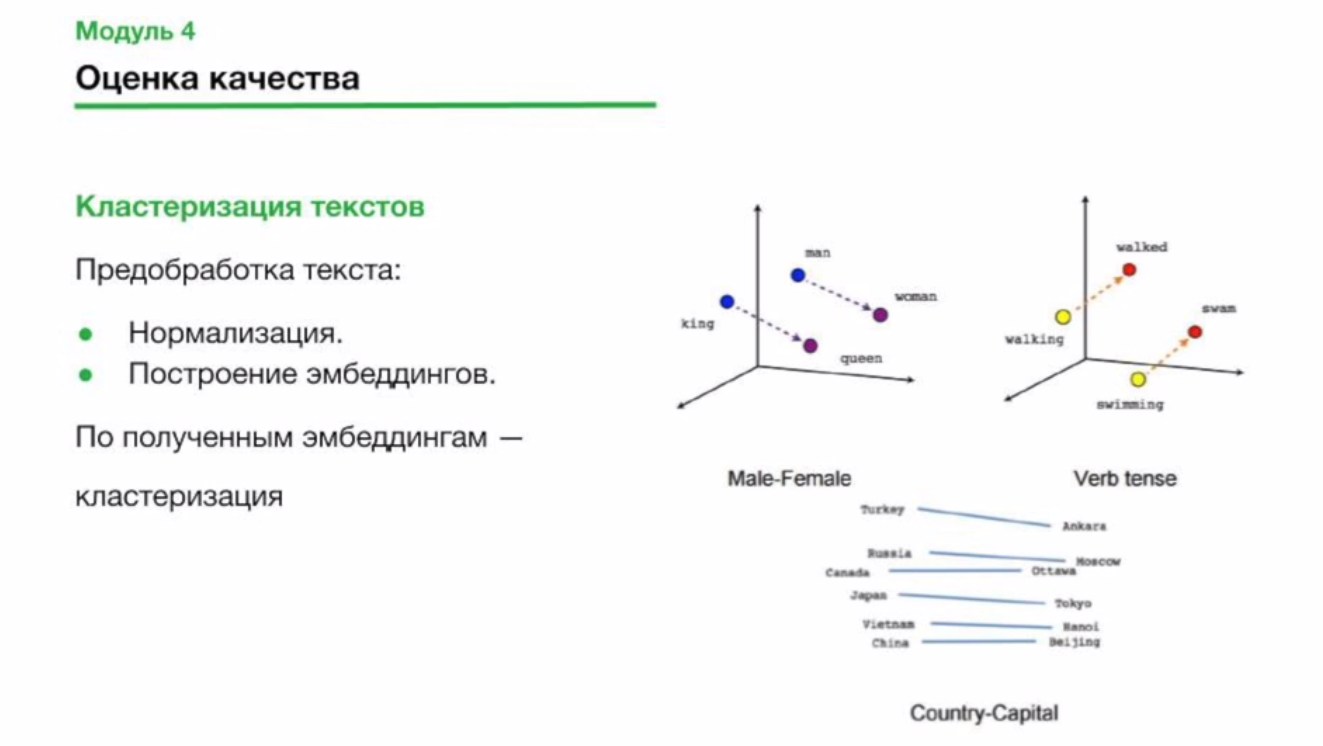

### Коэффициент силуэта. Практика

Датасет

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

Коэффициент силуэта можно посчитать при помощи реализации из библиотеки sklearn:

In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# сначала получим предсказанные кластеры при помощи метода кластеризации
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
kmeans_pred = kmeans.labels_

# теперь посчитаем коэффициент силуэта
silhouette_score(X=X, labels=kmeans_pred, metric='euclidean')

0.5131209788437305

В качестве параметров в функции silhouette_score используются:

X — массив признаков объектов выборки или массив попарных расстояний между объектами;<br />
Y — массив предсказанных кластеров для объектов выборки;<br />

metric — метрика, используемая для вычисления расстояния между объектами, мы будем использовать euclidean (Евклидово расстояние), полный список названий метрик можно увидеть здесь: https://scikit-learn.org/0.19/modules/generated/sklearn.metrics.pairwise.pairwise_distances.html

При решении заданий модуля стандартизация должна быть выключена.

#### Задание 4.11.1

Обучите модель GaussianMixture с параметрами n_components=3 и random_state=42 на признаках исходного датасета. Посчитайте коэффициент силуэта для получившейся кластеризации. Ответ округлите до десятых и запишите с точкой.

In [3]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, random_state=42)
gm.fit(X)
y_predict = gm.predict(X)
unique, counts = np.unique(y_predict, return_counts=True)
dict(zip(unique, counts))

# теперь посчитаем коэффициент силуэта
silhouette_score(X=X, labels=y_predict, metric='euclidean')

0.3987433090840964

#### Задание 4.11.2

Сравните результаты кластеризации четырёх рассмотренных алгоритмов на исходном датасете при помощи коэффициента силуэта, инициализируйте алгоритмы со следующими параметрами:

K-means — n_clusters=3, random_state=42<br />
EM-алгоритм (GaussianMixture) — n_components=3, random_state=42<br />
Агломеративная кластеризация – n_clusters=3<br />
DBSCAN – eps=0.9, min_samples=35

Укажите максимальное значение коэффициента силуэта, полученное при помощи данных моделей. Ответ округлите до сотых и запишите с точкой.

In [4]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=3)
ac.fit(X)
y_predict = ac.labels_

# теперь посчитаем коэффициент силуэта
silhouette_score(X=X, labels=y_predict, metric='euclidean')

0.4811992210663849

In [5]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.9, min_samples=35)
dbscan.fit(X)
dbscan.labels_
y_pred = dbscan.labels_.astype(np.int)

# теперь посчитаем коэффициент силуэта
silhouette_score(X=X, labels=y_predict, metric='euclidean')

0.4811992210663849

#### Задание 4.11.3

Подберите оптимальное количество кластеров с помощью коэффициента силуэта. Для этого найдите такое число кластеров, при котором значение коэффициента будет максимальным.

В трёх из рассмотренных нами алгоритмов необходимо задать число кластеров при инициализации: K-means, EM-алгоритм и агломеративная кластеризация.

Найдите значение коэффициента силуэта для данных алгоритмов при числе кластеров от 2 до 10 включительно. Для K-means и EM-алгоритма установите значение random_state=42.

В качестве ответа через пробел введите число кластеров, при котором значение коэффициента силуэта для результатов кластеризации было наибольшим для каждого из алгоритмов. Вводите в следующем порядке: K-means, EM-алгоритм, агломеративная кластеризация.

In [9]:
# сначала получим предсказанные кластеры при помощи метода кластеризации
kmeans = KMeans(n_clusters=3, random_state=42) #3 - max silhouette
kmeans.fit(X)
kmeans_pred = kmeans.labels_

# теперь посчитаем коэффициент силуэта
silhouette_score(X=X, labels=kmeans_pred, metric='euclidean')

0.5131209788437305

In [15]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=4, random_state=42) #4 - max silhouette
gm.fit(X)
y_predict = gm.predict(X)
unique, counts = np.unique(y_predict, return_counts=True)
dict(zip(unique, counts))

# теперь посчитаем коэффициент силуэта
silhouette_score(X=X, labels=y_predict, metric='euclidean')

0.510682306926087

In [21]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=4) #4 - max silhouette
ac.fit(X)
y_predict = ac.labels_

# теперь посчитаем коэффициент силуэта
silhouette_score(X=X, labels=y_predict, metric='euclidean')

0.48470679039805054